<a href="https://colab.research.google.com/github/kar-ridhi/Titanic_survival_using_ML_internship_TataSteel-21/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Tata Steel Internship(ML)/titanic_data.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**EDA-Exploratory Data Analysis Through Visualization**

Survived
0    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

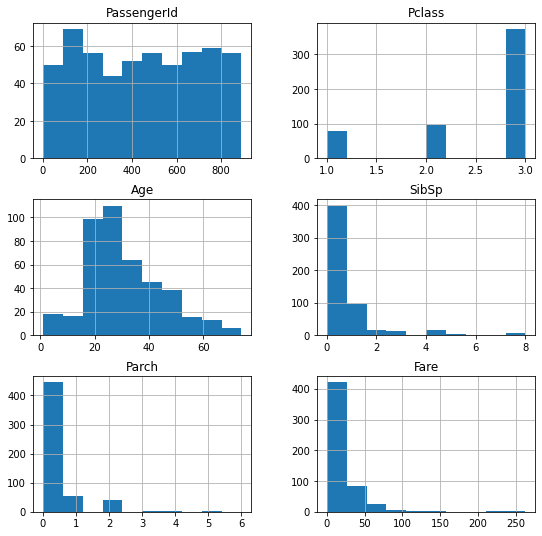

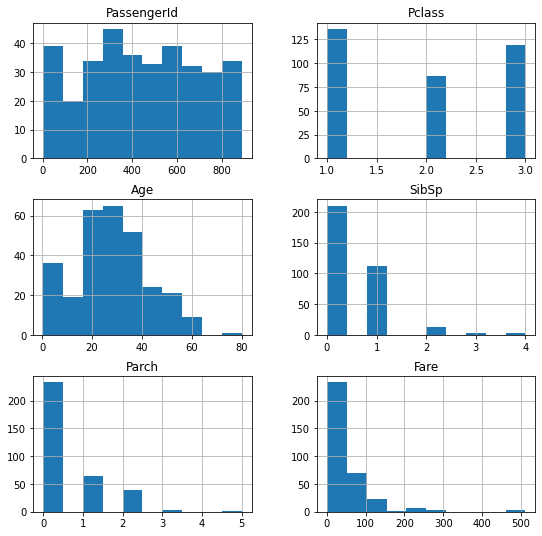

In [ ]:
df.groupby('Survived').hist(figsize =(9,9))

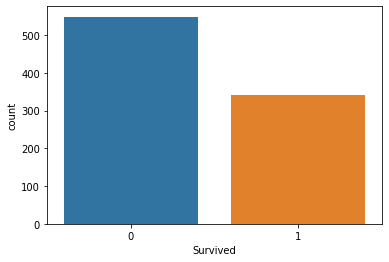

In [ ]:
sns.countplot(x = 'Survived',data =df)

In [ ]:
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


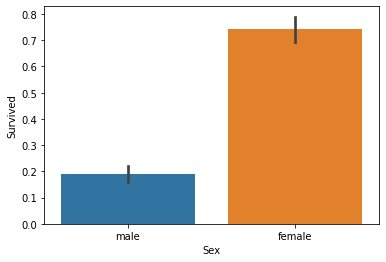

In [ ]:
sns.barplot(x = 'Sex',y ='Survived',data = df)

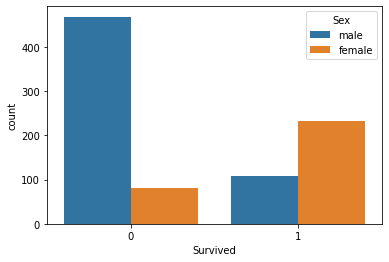

In [ ]:
sns.countplot(x= 'Survived',hue = 'Sex',data = df)

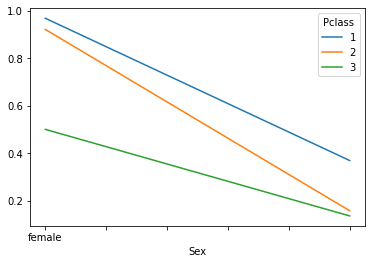

In [ ]:
df.pivot_table('Survived',index = 'Sex',columns ='Pclass').plot()

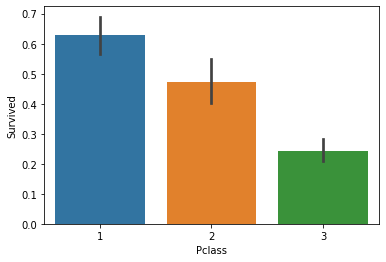

In [ ]:
sns.barplot(x = 'Pclass',y = 'Survived',data=df)

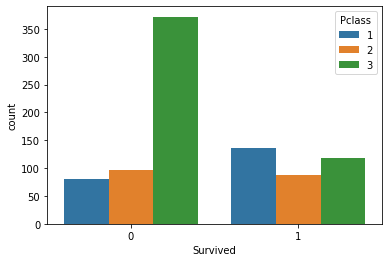

In [ ]:
sns.countplot(x = 'Survived',hue = 'Pclass',data = df)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


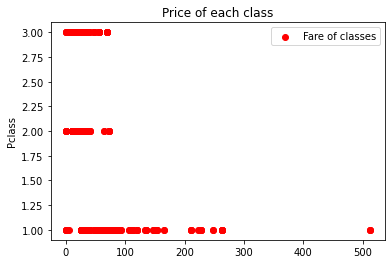

In [ ]:
plt.scatter(df['Fare'],df['Pclass'],color = 'red',label = 'Fare of classes')
plt.ylabel('Pclass')
plt.title("Price of each class")
plt.legend()
plt.show()

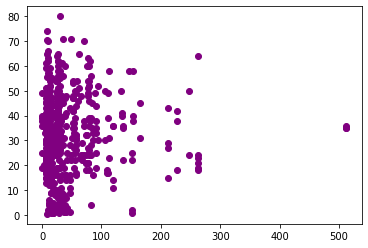

In [ ]:
plt.scatter(df['Fare'],df['Age'],color ='purple',label ="price paid")

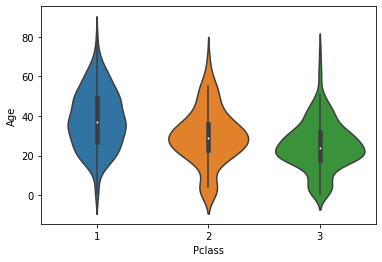

In [ ]:
sns.violinplot(x ='Pclass',y ='Age',data = df)

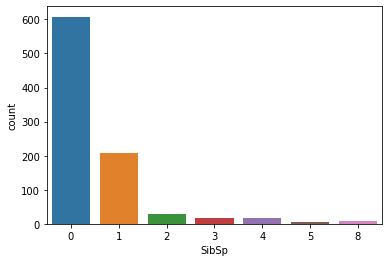

In [ ]:
sns.countplot(x = 'SibSp',data = df)

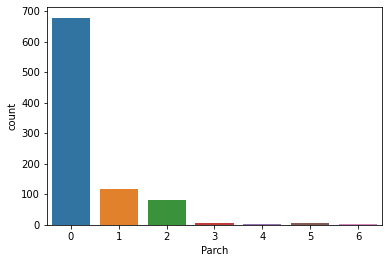

In [ ]:
sns.countplot(x = 'Parch',data = df)

## **Data Cleaning**

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Visualizing the null values by heatmap**

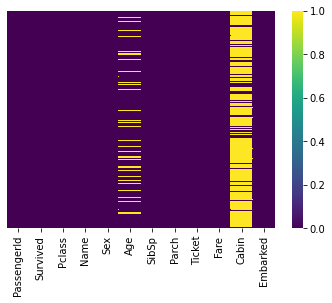

In [ ]:
sns.heatmap(df.isnull(),yticklabels = False,cmap = 'viridis')

**Removing the NaN(Not a Number) values**

In [ ]:
df.drop("Cabin", axis = 1,inplace = True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**Removing the rows containing the Null or Nan**

In [ ]:
df.dropna(inplace =True)
df.shape

(712, 11)

**Checking the null values through Heatmap again**

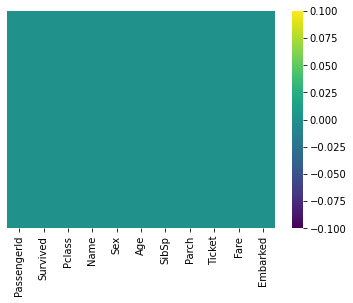

In [ ]:
sns.heatmap(df.isnull(),yticklabels = False,cmap = 'viridis')

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

Data Wrangling
It is the process of transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes such as analytics.

In [ ]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Embarked']=labelencoder.fit_transform(df['Embarked'].values)
df['Sex']=labelencoder.fit_transform(df['Sex'].values)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked         int64
dtype: object

In [ ]:
df['Sex'].unique()

array([1, 0])

In [ ]:
df['Embarked'].unique()

array([2, 0, 1])

In [ ]:
df.drop(['PassengerId','Name','Ticket'],axis = 1,inplace = True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


Defining Feature vector

In [ ]:
x = df.drop("Survived",axis = 1)
y= df["Survived"]

**Features Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc =StandardScaler()
x = sc.fit_transform(x)

In [ ]:
x

array([[ 0.90859974,  0.75613751, -0.52766856, ..., -0.50678737,
        -0.51637992,  0.51958818],
       [-1.48298257, -1.32251077,  0.57709388, ..., -0.50678737,
         0.69404605, -2.04948671],
       [ 0.90859974, -1.32251077, -0.25147795, ..., -0.50678737,
        -0.50362035,  0.51958818],
       ...,
       [-1.48298257, -1.32251077, -0.73481151, ..., -0.50678737,
        -0.08633507,  0.51958818],
       [-1.48298257,  0.75613751, -0.25147795, ..., -0.50678737,
        -0.08633507, -2.04948671],
       [ 0.90859974,  0.75613751,  0.16280796, ..., -0.50678737,
        -0.50692839, -0.76494927]])

**Spliting the data into train and testing set**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size =0.2,random_state = 0)

**Implementing the Machine Learning Algorithm**

1.Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(x_train,y_train)
predictions = lr.predict(x_test)

Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

81.11888111888112

Confusion Matrix


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[73,  9],
       [18, 43]])

**2.RandomForestClasssifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rdc=RandomForestClassifier(n_estimators = 10,criterion= 'entropy',random_state =0)
rdc.fit(x_train,y_train)
predictions = rdc.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

79.72027972027972

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[67, 15],
       [14, 47]])

**3. Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [ ]:
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  76.92307692307693


**4.Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print("Accuracy: ",svclassifier.score(x_test, y_test) * 100)

Accuracy:  79.02097902097903


**5.KNN classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(x_test)

In [ ]:
print("Accuracy: ",knn.score(x_test, y_test) * 100)

Accuracy:  78.32167832167832


**6.Gaussian Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(x_test)

In [ ]:
print("Accuracy: ",gnb.score(x_test, y_test) * 100)

Accuracy:  74.82517482517483
